In [1]:
using DynamicalSystems
using DifferentialEquations
using OrdinaryDiffEq

using StaticArrays

In [2]:
kvalues = range(1.0, 0.0, length = 10)
x1 = y1 = z1 = x2 = y2 = z3 = -15..15
box = x1 × y1 × z1 × x2 × y2 × z3

using CairoMakie

In [3]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end


HR (generic function with 1 method)

In [58]:
tspan = (0.0, 100000.0)

u0 = SA[0.02, 0.01, 0.01, 0.01, 0.01, 0.01]

a = 1.0
b = 3.0
c = 1.0
d = 5.0
xr = -1.6
r = 0.01
s = 5.0
I = 4.0
xv = 2.0

k1= -0.17
k2 = -0.17
k = 0.1111111111111111

p = SA[a, b, c, d, s, xr, r, I, xv, k1, k2, k]

12-element SVector{12, Float64} with indices SOneTo(12):
  1.0
  3.0
  1.0
  5.0
  5.0
 -1.6
  0.01
  4.0
  2.0
 -0.17
 -0.17
  0.1111111111111111

In [59]:
ds = ContinuousDynamicalSystem(HR, u0, p )

6-dimensional continuous dynamical system
 state:       [0.02, 0.01, 0.01, 0.01, 0.01, 0.01]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, 2.0, -0.17, -0.17, 0.111111]

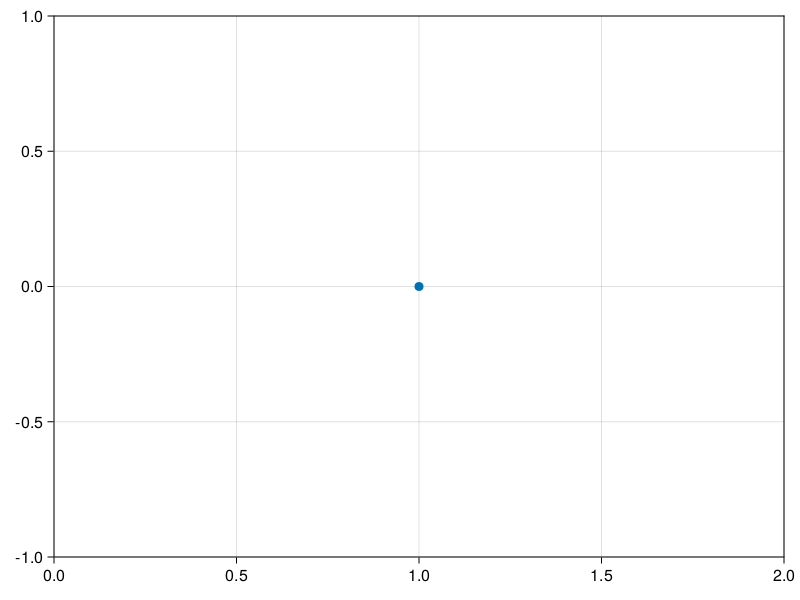

In [6]:
f = Figure()
ax = Axis(f[1, 1])
scatter!(ax, 1, 0.0)
f

In [60]:
fp, eigs, stable = fixedpoints(ds, box)

(6-dimensional Dataset{Float64} with 1 points, Vector{ComplexF64}[[-7.397646171355659 + 0.0im, -7.268572009186301 + 0.0im, 0.043637659307650394 + 0.0im, 0.06856943176780866 - 0.022961259334100606im, 0.06856943176780866 + 0.022961259334100606im, 0.117140581045749 + 0.0im]], Bool[0])

In [106]:
sort(eigs[1], lt = (x,y) -> imag(x)==imag(y) ? real(x)<real(y)  : real(x)<real(y))

6-element Vector{ComplexF64}:
   -7.397646171355659 + 0.0im
   -7.268572009186301 + 0.0im
 0.043637659307650394 + 0.0im
  0.06856943176780866 - 0.022961259334100606im
  0.06856943176780866 + 0.022961259334100606im
    0.117140581045749 + 0.0im

In [62]:
eigs[1]

6-element Vector{ComplexF64}:
   -7.397646171355659 + 0.0im
   -7.268572009186301 + 0.0im
 0.043637659307650394 + 0.0im
  0.06856943176780866 - 0.022961259334100606im
  0.06856943176780866 + 0.022961259334100606im
    0.117140581045749 + 0.0im

In [24]:
f = Figure()
ax = Axis(f[1, 1])

for index in range(1, 5, step = 2)
    
        f_p = eigs[1][index]
        s_p = eigs[1][index+1]
       
        re1 = f_p.re
        im1 = f_p.im
        re2 = s_p.re
        im2 = s_p.im
            
        println("Re first pair pair: $re1")
        println("Re second pair pair: $re2")
        println("--------------")
        println("Im first pair: $im1")
        println("Im second pair: $im2")
        println(">>>>>>>>>>>>>")
    
        scatter!(ax, re1, im1, color = COLORS[index])
        scatter!(ax, re2, im2, color = COLORS[index])
    
        prre1 = f_p.re
        prim1 = f_p.im
        prre2 = s_p.re
        prim2 = s_p.im
        
end

Re first pair pair: -8.951148537373273
Re second pair pair: -7.268572009186295
--------------
Im first pair: 0.0
Im second pair: 0.0
>>>>>>>>>>>>>
Re first pair pair: -0.043568274112274166
Re second pair pair: -0.043568274112274166
--------------
Im first pair: -0.06640310594655666
Im second pair: 0.06640310594655666
>>>>>>>>>>>>>
Re first pair pair: 0.04363765930765128
Re second pair pair: 0.11714058104574845
--------------
Im first pair: 0.0
Im second pair: 0.0
>>>>>>>>>>>>>


In [ ]:
f = Figure()
ax = Axis(f[1,1]; xlabel = L"Re", ylabel = L"Im")

xlims!(-1.3, 1.3)
vlines!(ax, 0.0, lw = 0.5, linestyle = :dash)

for (index, k) in enumerate(kvalues)
    
    println("index: $index");flush(stdout)
    println("k: $k");flush(stdout)
    
    p = SA[a, b, c, d, s, xr, r, I, xv, k1, k2, k]
    ds = ContinuousDynamicalSystem(HR, u0, p )
    
    fp, eigs, stable = fixedpoints(ds, box)
    eigins = eigs[1]
    
    println("fixed  points: ", fp); flush(stdout)
    println("eigins: $eigins")
    println("")
    for index in range(1, 5, step = 2)
    
        f_p = eigins[index]
        s_p = eigins[index+1]
       
        re1 = f_p.re
        im1 = f_p.im
        re2 = s_p.re
        im2 = s_p.im
        println("Re first pair pair: $re1")
        println("Re second pair pair: $re2")
        println(" ")
        println("Im first pair: $im1")
        println("Im second pair: $im2")
        println("----------------")
        println("----------------")
        
        if im1 != 0
            scatter!(ax, re1, im1, color = "black")
        else
            scatter!(ax, re1, im1, color = COLORS[index])
        end
        
        if im2 != 0
            scatter!(ax, re2, im2, color = "black")
        else
            scatter!(ax, re2, im2, color = COLORS[index])
        end
        
        
    end
    println(">>>>>>>>>>>>>>>>>"); flush(stdout)
    println("")
    
end

index: 1
k: 1.0
fixed  points: 6-dimensional Dataset{Float64} with 1 points
eigins: ComplexF64[-8.951148537373273 + 0.0im, -7.268572009186295 + 0.0im, -0.043568274112274166 - 0.06640310594655666im, -0.043568274112274166 + 0.06640310594655666im, 0.04363765930765128 + 0.0im, 0.11714058104574845 + 0.0im]

Re first pair pair: -8.951148537373273
Re second pair pair: -7.268572009186295
 
Im first pair: 0.0
Im second pair: 0.0
----------------
----------------
Re first pair pair: -0.043568274112274166
Re second pair pair: -0.043568274112274166
 
Im first pair: -0.06640310594655666
Im second pair: 0.06640310594655666
----------------
----------------
Re first pair pair: 0.04363765930765128
Re second pair pair: 0.11714058104574845
 
Im first pair: 0.0
Im second pair: 0.0
----------------
----------------
>>>>>>>>>>>>>>>>>

index: 2
k: 0.8888888888888888
fixed  points: 6-dimensional Dataset{Float64} with 1 points
eigins: ComplexF64[-8.75258003499041 + 0.0im, -7.2685720091862995 + 0.0im, -0.03174

In [ ]:
xlims!(-0.05, 0.15)
f

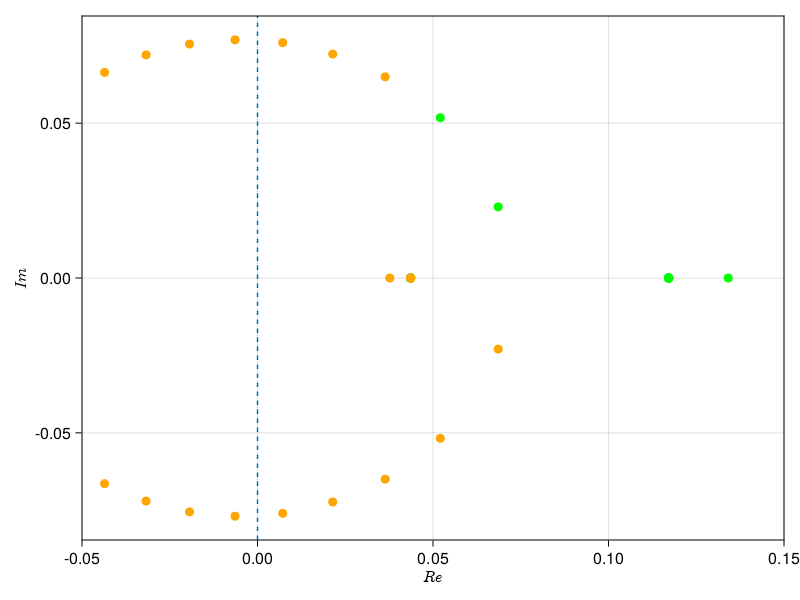

In [51]:
xlims!(-0.05, 0.15)
f

In [ ]:
index: 7
k: 0.3333333333333333
fixed  points: 6-dimensional Dataset{Float64} with 1 points
eigins: ComplexF64[-7.777715001024106 + 0.0im, -7.268572009186303 + 0.0im, 0.03638162437980823 - 0.06497134231440276im, 0.03638162437980823 + 0.06497134231440276im, 0.04363765930765126 + 0.0im, 0.11714058104574814 + 0.0im]


Re first pair pair: 0.03638162437980823
Re second pair pair: 0.03638162437980823
 
Im first pair: -0.06497134231440276
Im second pair: 0.06497134231440276
----------------
----------------

>>>>>>>>>>>>>>>>>

index: 8
k: 0.2222222222222222
fixed  points: 6-dimensional Dataset{Float64} with 1 points
eigins: ComplexF64[-7.586885942402814 + 0.0im, -7.268572009186304 + 0.0im, 0.043637659307650935 + 0.0im, 0.05207820618027373 - 0.051762179819630945im, 0.05207820618027373 + 0.051762179819630945im, 0.11714058104574826 + 0.0im]

Re first pair pair: 0.043637659307650935
Re second pair pair: 0.05207820618027373
 
Im first pair: 0.0
Im second pair: -0.051762179819630945
----------------
----------------
Re first pair pair: 0.05207820618027373
Re second pair pair: 0.11714058104574826
 
Im first pair: 0.051762179819630945
Im second pair: 0.0

>>>>>>>>>>>>>>>>>

index: 9
k: 0.1111111111111111
fixed  points: 6-dimensional Dataset{Float64} with 1 points
eigins: ComplexF64[-7.397646171355659 + 0.0im, -7.268572009186301 + 0.0im, 0.043637659307650394 + 0.0im, 0.06856943176780866 - 0.022961259334100606im, 0.06856943176780866 + 0.022961259334100606im, 0.117140581045749 + 0.0im]

Re first pair pair: -7.397646171355659
Re second pair pair: -7.268572009186301
 
Im first pair: 0.0
Im second pair: 0.0
----------------
----------------
Re first pair pair: 0.043637659307650394
Re second pair pair: 0.06856943176780866
 
Im first pair: 0.0
Im second pair: -0.022961259334100606
----------------
----------------
Re first pair pair: 0.06856943176780866
Re second pair pair: 0.117140581045749
 
Im first pair: 0.022961259334100606
Im second pair: 0.0
----------------
----------------
>>>>>>>>>>>>>>>>>

index: 10
k: 0.0
fixed  points: 6-dimensional Dataset{Float64} with 1 points
eigins: ComplexF64[-7.268572009186302 + 0.0im, -7.210096522033619 + 0.0im, 0.037708218793220824 + 0.0im, 0.04363765930765135 + 0.0im, 0.11714058104574797 + 0.0im, 0.13410321764257688 + 0.0im]

Re first pair pair: -7.268572009186302
Re second pair pair: -7.210096522033619
 
Im first pair: 0.0
Im second pair: 0.0
----------------
----------------
Re first pair pair: 0.037708218793220824
Re second pair pair: 0.04363765930765135
 
Im first pair: 0.0
Im second pair: 0.0
----------------
----------------
Re first pair pair: 0.11714058104574797
Re second pair pair: 0.13410321764257688
 
Im first pair: 0.0
Im second pair: 0.0
----------------
----------------
>>>>>>>>>>>>>>>>>

In [18]:
COLORS = [
    "black",
     "red",
    "orange",
    "yellow",
    "lime",
    "green"
]

6-element Vector{String}:
 "black"
 "red"
 "orange"
 "yellow"
 "lime"
 "green"

In [26]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"Re", ylabel = L"Im")

vlines!(0.0, lw = 0.5, linestyle = :dash)

for (index_k, k) in enumerate(kvalues)
    
    println("k: ", k); flush(stdout)
    println("index: ", index_k); flush(stdout)
    p = SA[a, b, c, d, s, xr, r, I, xv, k1, k2, k]
    ds = ContinuousDynamicalSystem(HR, condition1, p )
    
    x1 = y1 = z1 = x2 = y2 = z3 = -10..10
    box = x1 × y1 × z1 × x2 × y2 × z3
    
    fp, eigs, stable = fixedpoints(ds, box)
    eigins = eigs[1]
    
    println("fixed  points: ", fp); flush(stdout)
    println("eigs: ", eigins); flush(stdout)
    
    for (index_eig, eig) in enumerate(eigins)
        
        re = eig.re
        im = eig.im
        
        if index_eig >= 3
         scatter!(ax, re, im, color = "blue", markersize = 4.0 ) # COLORS[index_eig]
        end
    end
    println(">>>>>>>>>>>>>>>>>"); flush(stdout)
    println("")
end

k: 1.0
index: 1


LoadError: UndefVarError: condition1 not defined

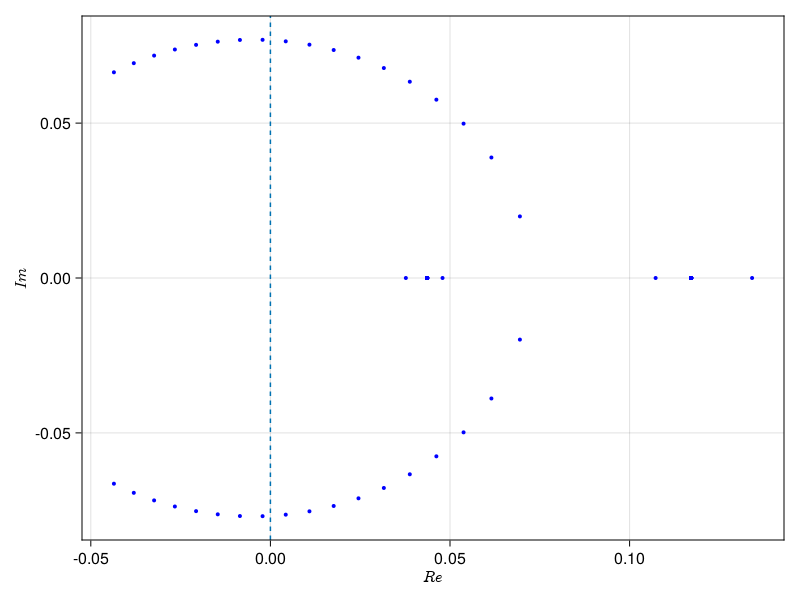

In [80]:
fig

In [ ]:
index: 9
k: 0.1111111111111111
fixed  points: 6-dimensional Dataset{Float64} with 1 points

Re first pair pair: -7.397646171355659
Re second pair pair: -7.268572009186301
|||||||||||||||
Im first pair: 0.0
Im second pair: 0.0
----------------
Re first pair pair: 0.043637659307650394
Re second pair pair: 0.06856943176780866
|||||||||||||||
Im first pair: 0.0
Im second pair: -0.022961259334100606
----------------
Re first pair pair: 0.06856943176780866
Re second pair pair: 0.117140581045749
|||||||||||||||
Im first pair: 0.022961259334100606
Im second pair: 0.0
----------------
>>>>>>>>>>>>>>>>>

## k = 0.0

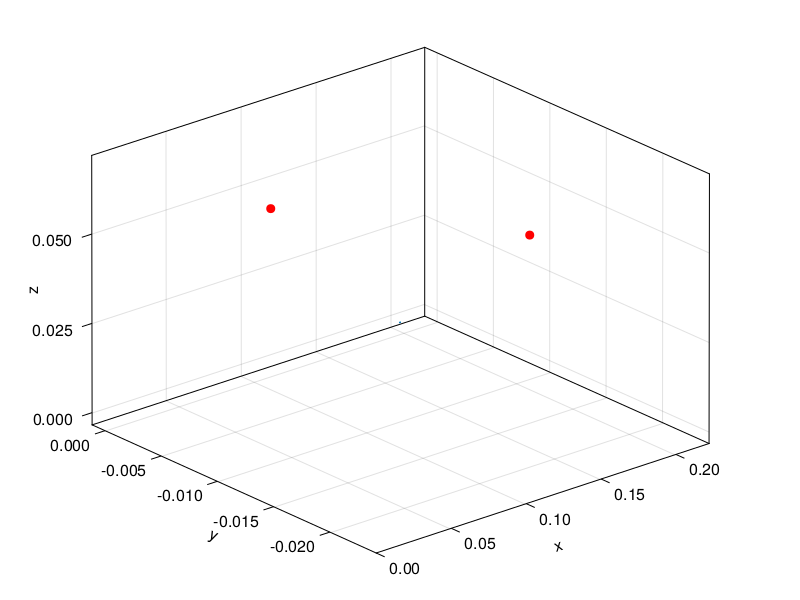

In [40]:
f3d = Figure()
ax = Axis3(f3d[1, 1])
scatter!(ax, 0.1111111111111111, 0.0, 0.043637659307650394, color = "red"  )
scatter!(ax, 0.1111111111111111, -0.022961259334100606, 0.06856943176780866, color = "red"  )
hlines!(ax, 0, 1.0, 0)
f3d

In [53]:
fp

6-dimensional Dataset{Float64} with 1 points
 -0.738229  -1.72491  4.30886  -0.738229  -1.72491  4.30886

In [54]:
eigs[1]

6-element Vector{ComplexF64}:
    -7.2685720091863 + 0.0im
  -7.210096522033617 + 0.0im
 0.03770821879322181 + 0.0im
 0.04363765930765034 + 0.0im
  0.1171405810457492 + 0.0im
  0.1341032176425762 + 0.0im

## k = 0.5

In [59]:
fp

6-dimensional Dataset{Float64} with 1 points
 -0.738229  -1.72491  4.30886  -0.738229  -1.72491  4.30886

In [60]:
eigs[1]

6-element Vector{ComplexF64}:
   -8.066732749238547 + 0.0im
   -7.268572009186302 + 0.0im
 0.014223831820364656 - 0.0745461985531838im
 0.014223831820364656 + 0.0745461985531838im
  0.04363765930765022 + 0.0im
  0.11714058104574947 + 0.0im

## k = 0.133

In [71]:
fp

6-dimensional Dataset{Float64} with 1 points
 -0.738229  -1.72491  4.30886  -0.738229  -1.72491  4.30886

In [72]:
eigs[1]

6-element Vector{ComplexF64}:
  -7.434795995137219 + 0.0im
  -7.268572009186299 + 0.0im
 0.04363765930765188 + 0.0im
 0.06525545476970074 - 0.0316775372851849im
 0.06525545476970074 + 0.0316775372851849im
 0.11714058104574744 + 0.0im

## k = 0.134

In [77]:
fp

6-dimensional Dataset{Float64} with 1 points
 -0.738229  -1.72491  4.30886  -0.738229  -1.72491  4.30886

In [16]:
eigs[1]

6-element Vector{ComplexF64}:
   -8.933053010985624 + 0.0im
   -7.268572009186305 + 0.0im
 -0.04251502720509005 - 0.06700896704899675im
 -0.04251502720509005 + 0.06700896704899675im
  0.04363765930765141 + 0.0im
  0.11714058104574782 + 0.0im

In [78]:
eigs[1]

6-element Vector{ComplexF64}:
  -7.436494748587782 + 0.0im
  -7.268572009186302 + 0.0im
 0.04363765930765181 + 0.0im
 0.06510483149497995 - 0.032009203936183644im
 0.06510483149497995 + 0.032009203936183644im
 0.11714058104574716 + 0.0im

## k = 1.0

In [83]:
fp

6-dimensional Dataset{Float64} with 1 points
 -0.738229  -1.72491  4.30886  -0.738229  -1.72491  4.30886

In [84]:
eigs[1]

6-element Vector{ComplexF64}:
   -8.951148537373278 + 0.0im
     -7.2685720091863 + 0.0im
 -0.04356827411227428 - 0.06640310594655666im
 -0.04356827411227428 + 0.06640310594655666im
 0.043637659307650824 + 0.0im
   0.1171405810457494 + 0.0im